<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2001%EC%9D%BC/11%EC%9B%94_1%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
d = pd.DataFrame({'date': ['2019-01-03', '2021-11-22', '2023-01-05'],
                  'name': ['J', 'Y', 'O']})
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [ ]:
# datetime()으로 변환
d.dtypes
d['date'] = pd.to_datetime(d.date, format='%Y-%m-%d')
d.dtypes

date    datetime64[ns]
name            object
dtype: object

In [ ]:
d = d.set_index('date')
d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2019-01-03 to 2023-01-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
dtypes: object(1)
memory usage: 48.0+ bytes


In [ ]:
import numpy as np
d = pd.DataFrame({'date':['2019-01-03', '2021-11-22','2021-12-01','2023-01-05'], 'x1':[0.1,2.0,np.nan,1.2]})

# datetime으로 변환
d['date'] = pd.to_datetime(d.date, format='%Y-%m-%d')
d.dtypes

# datetime을 인덱스로 지정
d.set_index('date',inplace=True)
d
# null 값이 있는지 확인
d.isnull().sum()

# 전체 데이터 출력
d

# 이전값으로 결측값 채우기
d.fillna(method='pad',inplace=True)
d

# 결측값 제거
d.dropna()

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-01,2.0
2023-01-05,1.2


In [ ]:
# interpolate() 함수 사용해서 결측값 발생 전후 관측치의 평균으로 결측값 채울 수 ㅇㅇ
d = pd.DataFrame({'date':['2019-01-03', '2021-11-22','2021-12-01','2023-01-05'], 'x1':[0.1,2.0,np.nan,1.2]})
d['date'] = pd.to_datetime(d.date, format='%Y-%m-%d')
d.set_index('date',inplace=True)
print(d,'\n')
d = d.interpolate()
print(d)

             x1
date           
2019-01-03  0.1
2021-11-22  2.0
2021-12-01  NaN
2023-01-05  1.2 

             x1
date           
2019-01-03  0.1
2021-11-22  2.0
2021-12-01  1.6
2023-01-05  1.2


<Axes: ylabel='Age'>

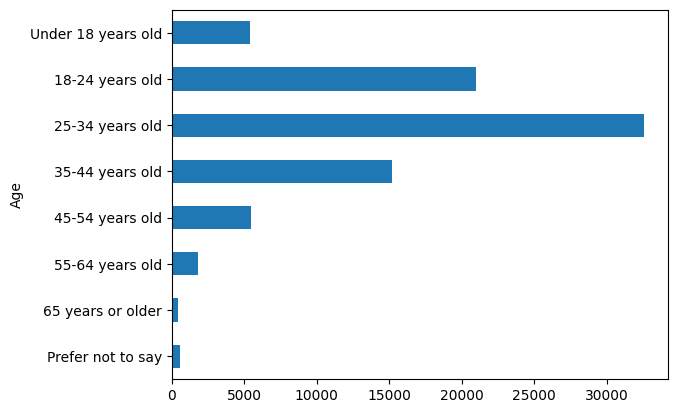

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/survey_results_public.csv')
df.head()
# 이 csv 파일에서 결측치는 대답 안함 의미

# 필요한 열만 추출(Age, Country, LanguageHaveWorkedWith, LearnCode)
survey = df[['Age','Country','LanguageHaveWorkedWith','LearnCode']]
survey.head()

# 특정 열 데이터 조회 - 개발자의 연령대 정보 확인
survey['Age']
survey['Age'].value_counts()
survey['Age'].drop_duplicates()
# 데이터 그룹별 크기 구하기(연령대별 응답숫자 확인)
size_age = survey.groupby('Age').size()
size_age

# 위와 동일한 방식으로 국가별 응답 숫자 구하기
survey['Country'].value_counts()
survey['Country'].drop_duplicates()
size_country = survey.groupby('Country').size()
size_country.sort_values(ascending=False)

# 선 그래프
# size_age.plot(rot=30)  # rot == 입력한 숫자의 각도 만큼 회전시켜 보여줌(X축)

# 막대 그래프
# size_age.plot.bar()

# 막대 그래프(가로)
# size_age.plot.barh()

# 그룹 이름(색인) 순서 변경하기
# 연령대 가장 낮은 Under 18 years old 가 제일 위, Prefer not to say가 제일 아래
new_index = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
             '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
idx = ['Prefer not to say', '65 years or older','55-64 years old', '45-54 years old',
       '35-44 years old', '25-34 years old', '18-24 years old','Under 18 years old']
size_age = size_age.reindex(idx)
size_age.plot.barh()




<Axes: ylabel='LanguageHaveWorkedWith'>

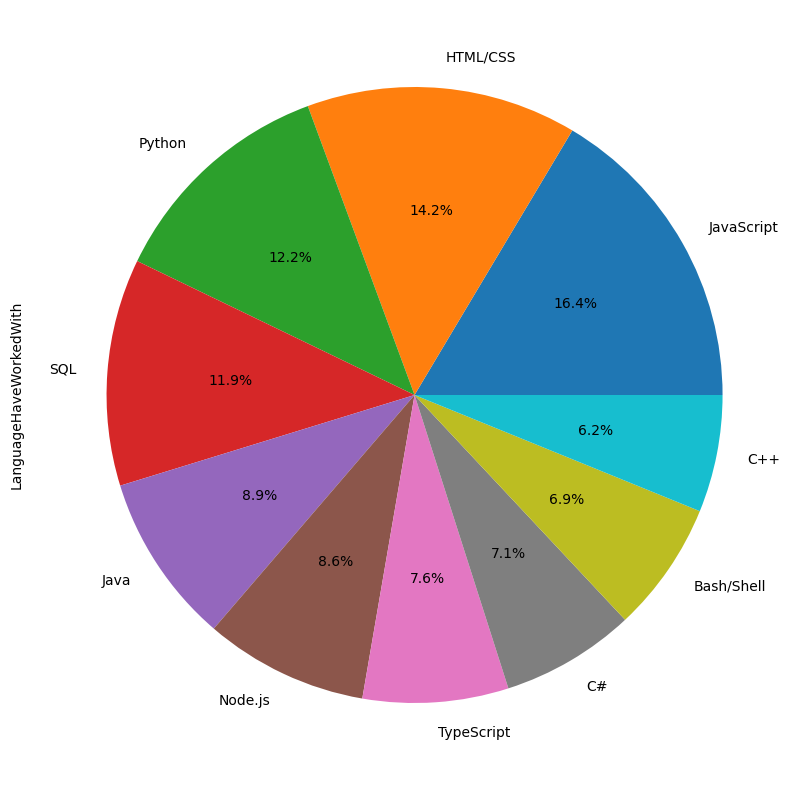

In [ ]:
# 오후 부분
# 국가별 응답자수 파이 그래프로 그리기
# size_country.plot.pie(autopct='%.1f%%')

# 위 결과 실행하면 국가 알아보기 어려우므로 상위 20개만 추려냄
top_con = size_country.nlargest(20)

# top_con.plot.pie(figsize=(10,10), autopct='%.1f%%')
# 프로그래밍별 응답수 확인하기
# 리스트로 만들어 분할 한 뒤 ~
language = survey['LanguageHaveWorkedWith']
language = language.str.split(';')
lan = language.explode()
lang = lan.value_counts()

# 위 결과 파이 그래프로 표현
# lang.plot.pie(figsize=(10,10), autopct='%.1f%%')
# 상위 10개 데이터만 파이로 표현
lang.nlargest(10).plot.pie(figsize=(10,10), autopct='%.1f%%')

## 레스토랑 데이터 전처리

<ipython-input-2-46f06a641a8d>:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('order_id').sum()
<ipython-input-2-46f06a641a8d>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('order_id').sum()


<Axes: xlabel='order_id'>

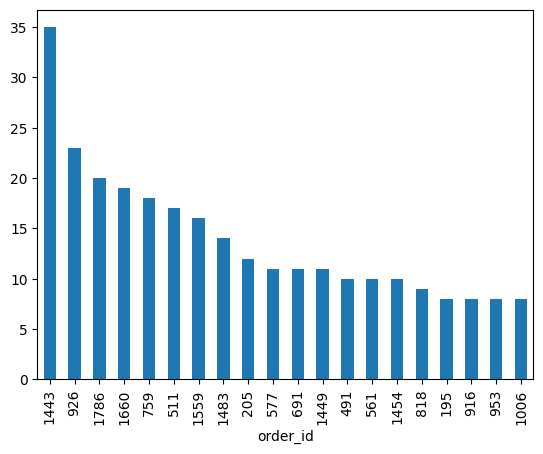

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/chipotle.tsv',sep='\t')  # tsv 파일 읽어오는 법
df.head()

# 필요없는 컬럼 제거(choice_description)
df.drop('choice_description',axis=1,inplace=True)
df.head()

# 계산을 위해 item_price 데이터형 변환
df.dtypes
df['item_price'] = df['item_price'].str.replace('$','',regex=True)
df['item_price'] = pd.to_numeric(df['item_price'])
df.dtypes

# 가장 인기 있는 메뉴 top 10 시각화
pop = df.groupby('item_name')['quantity'].sum()
# pop.nlargest(10).plot.barh()

# 가장 매출이 높은 메뉴 top 10 시각화
pop = df.groupby('item_name')['item_price'].sum()
# pop.nlargest(10).plot.barh()

# 메뉴의 인기(주문수)와 총 매출 사이의 상관관계 by 산점도
data = df.groupby('item_name').sum()
# data.plot.scatter(x='quantity', y='item_price')
# plt.rc('font', family='Malgun Gothic')
# plt.title('메뉴의 인기와 매출의 상관관계')

# 주문별 매출액
data = df.groupby('order_id').sum()
# data['item_price'].nlargest(20).plot.bar()

# 주문당 주문 메뉴 개수
data = df.groupby('order_id').sum()
data['quantity'].nlargest(20).plot.bar()